# House Rental Prediction

In [78]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [81]:
# Load the Data
rental_data = pd.read_csv(r'https://github.com/edyoda/data-science-complete-tutorial/raw/master/Data/house_rental_data.csv.txt')
rental_data.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [83]:
rental_data.shape

(645, 8)

In [85]:
rental_data.columns

Index(['Unnamed: 0', 'Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room',
       'Bathroom', 'Price'],
      dtype='object')

In [87]:
rental_data = rental_data.drop('Unnamed: 0',axis=1)
rental_data.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


# Data Cleaning, Data Wrangling, Data Preprocessing

In [90]:
rental_data.isnull().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

- No missing values

<AxesSubplot:xlabel='Sqft', ylabel='Price'>

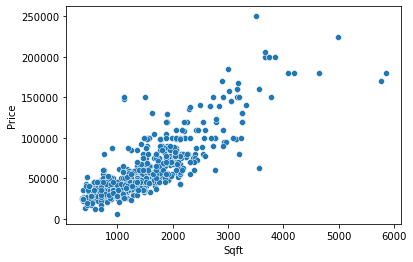

In [93]:
sns.scatterplot(x=rental_data['Sqft'], y= rental_data['Price'])

<AxesSubplot:xlabel='Sqft', ylabel='Price'>

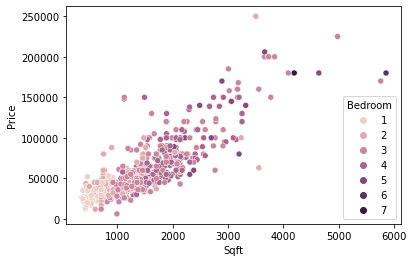

In [95]:
sns.scatterplot(x=rental_data['Sqft'], y= rental_data['Price'], hue= rental_data['Bedroom'])

<AxesSubplot:xlabel='Price', ylabel='Count'>

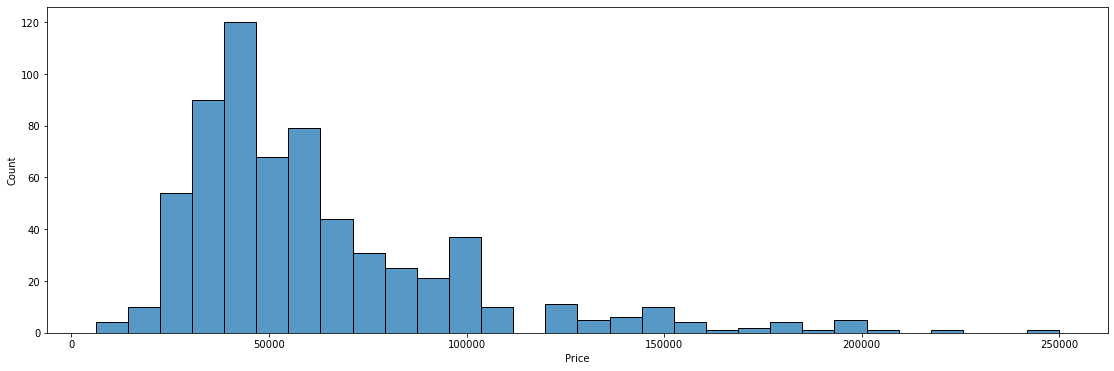

In [97]:
plt.figure(figsize=(19,6))
sns.histplot(x=rental_data['Price'])

In [99]:
rental_data.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


# Feature Scaling

In [102]:
rs = RobustScaler()
rs

RobustScaler()

In [104]:
rental_data[['Sqft','Floor','TotalFloor','Bedroom','Living.Room','Bathroom']] = rs.fit_transform(rental_data[['Sqft','Floor','TotalFloor','Bedroom','Living.Room','Bathroom']])
rental_data.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,-0.253676,-0.6,-0.714286,-0.5,0.0,0.0,62000
1,0.735294,0.0,-0.714286,0.5,0.0,0.0,78000
2,-0.294118,0.0,-0.714286,-0.5,0.0,-1.0,58000
3,0.036765,-0.6,-0.714286,0.0,0.0,0.0,45000
4,-0.470588,1.2,0.285714,0.0,0.0,0.0,45000


<AxesSubplot:>

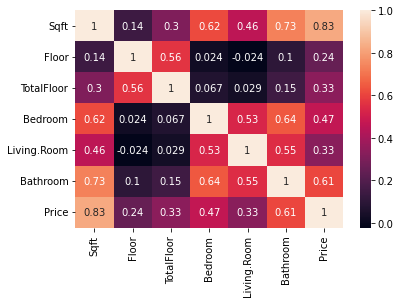

In [106]:
sns.heatmap(rental_data.corr(), annot=True)

## Observations:
- Price (dep) and Sqft(indep) : 0.83
- Price (dep) and Bathroom(indep) : 0.61
- Price (dep) and Bedroom(indep) : 0.47
- Price (dep) and totalfloor(indep) : 0.33
- Price (dep) and livingroom(indep) : 0.33
- Price (dep) and floor(indep) : 0.24
- Inorder to avoid the problem of multicolinearity we have to drop the columns with less relation to the target variable.

In [109]:
rental_data = rental_data.drop(['Floor','TotalFloor','Living.Room'],axis=1)
rental_data.head()

,Sqft,Bedroom,Bathroom,Price
0,-0.253676,-0.5,0.0,62000
1,0.735294,0.5,0.0,78000
2,-0.294118,-0.5,-1.0,58000
3,0.036765,0.0,0.0,45000
4,-0.470588,0.0,0.0,45000


<AxesSubplot:>

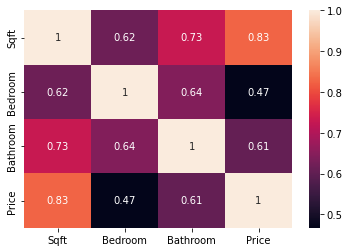

In [111]:
sns.heatmap(rental_data.corr(),annot = True)

- bathroom and sqft having a relation of 0.73 - high value for multicolinearity issue, hence dropping bathroom column also.

In [114]:
rental_data = rental_data.drop('Bathroom',axis=1)
rental_data.head()

,Sqft,Bedroom,Price
0,-0.253676,-0.5,62000
1,0.735294,0.5,78000
2,-0.294118,-0.5,58000
3,0.036765,0.0,45000
4,-0.470588,0.0,45000


For the time being we are keeping the Bedroom column even though it is creating multicolinearity issue.

# Separate the data into x and y

In [118]:
x = rental_data.drop('Price', axis = 1)
y = rental_data['Price']

# Split the data

In [121]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Apply Linear Regressions in train dataset

In [124]:
lr = LinearRegression()
lr

LinearRegression()

In [126]:
lr.fit(x_train,y_train)

LinearRegression()

# Perform Predictions on the test set

In [129]:
y_pred = lr.predict(x_test)

In [131]:
y_pred

array([101021.60017086,  39750.59879229,  71793.12872738,  86699.88335606,
        32314.78591578, 112722.35644844, 126178.22616765,  68844.52040753,
        60226.92227804,  37714.67606894,  50866.31725598,  34216.15881089,
        21052.80799862,  62151.7144236 ,  42968.30676862,  86688.17373083,
        40908.96479482,  35386.23443865,  67539.89495153,  55839.13867395,
        31133.0006628 , 159051.47432265,  80106.4983247 ,  76461.72161318,
        70903.86238133,  83616.72520797,  71038.41220958,  59214.81572898,
        69283.29876794,  61847.48589144,  87858.24935859,  23977.99706801,
        80545.27668511, 105409.38377495,  55839.13867395,  34485.25846738,
        71927.67855562,  73378.56346509,  54669.0630462 ,  59934.4033711 ,
        55400.36031354,  44138.38239638,  80106.4983247 ,  57155.47375518,
        80691.53613858,  46771.05255883,  69733.78675357,  34058.18973219,
       235592.00698821,  66943.14751242, 152370.37796395,  68856.23003276,
        34216.15881089,  

# Evaluation

In [134]:
r2_score(y_test,y_pred)

0.655558234640123

We are getting 65.5% accuracy by using linear regression for the above data. 